<a href="https://colab.research.google.com/github/ioloi1128/IPCS_1111_modelling/blob/main/Week5_makingtimestepping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week 5: Making a model from the energy balance equation.

modified from
https://brian-rose.github.io/ClimateLaboratoryBook/courseware/zero-dim-ebm.html

https://brian-rose.github.io/ClimateLaboratoryBook/courseware/assignment-zero-dim-ebm.html

## Recap of Week 3:

By assuming energy equilibrium, we derive the equilibrium surface temperature $T_s$:

$$ (1-\alpha) Q = \tau \sigma T_s^4 $$

where $\sigma$ is the Stephan-Boltzmann constant, $5.67*10^{-8} W m^{-2} K^{-4}$, $\tau$ is the **transmissivity** of the atmosphere, $\alpha$ is reflectivity, and Q is solar radiation.

In [ ]:
Q = 341.3  # the insolation
Freflected = 101.9  #  reflected shortwave flux in W/m2
alpha = Freflected / Q
print(alpha)

OLRobserved = 238.5  # in W/m2
sigma = 5.67E-8  # S-B constant
Tsobserved = 288.  # global average surface temperature
tau = OLRobserved / sigma / Tsobserved**4  # solve for tuned value of transmissivity
print(tau)

0.29856431292118374
0.6114139923687016


In [ ]:
#  define a reusable function!
def equilibrium_temperature(alpha,Q,tau):
    return ((1-alpha)*Q/(tau*sigma))**(1/4)

Teq_observed = equilibrium_temperature(alpha,Q,tau)
print(Teq_observed)

288.27131447889224


## Part I: Time derivative of zero equilibrium model

### An energy balance **equation**

We will write the **total energy budget** of the Earth system as

$$
\begin{align} 
\frac{dE}{dt} &= \text{net energy flux in to system} \\
 &= \text{flux in – flux out} \\
 &= \text{ASR} - \text{OLR}
\end{align}
$$

where $E$ is the **enthalpy** or **heat content** of the total system.

We will express the budget **per unit surface area**, so each term above has units W m$^{-2}$

**This equation is the starting point for EVERY CLIMATE MODEL.**

But so far, we don’t actually have a MODEL. We just have a statement of a budget. To use this budget to make a model, we need to relate terms in the budget to state variables of the atmosphere-ocean system.

For now, the state variable we are most interested in is **temperature** – because it is directly connected to the physics of each term above.


### An energy balance **model**

If we now suppose that 

$$ E = C T_s $$

where $T_s$ is the **global mean surface temperature**, and $C$ is a constant – the **effective heat capacity** of the atmosphere- ocean column.

then our budget equation becomes:

$$ C \frac{dT_s}{dt} = \text{ASR} - \text{OLR} $$

where

- $C$ is the **heat capacity** of Earth system, in units of J m$^{-2}$ K$^{-1}$.
- $\frac{dT_s}{dt}$ is the rate of change of global average surface temperature.

By adopting this equation, we are assuming that the energy content of the Earth system (atmosphere, ocean, ice, etc.) is *proportional to surface temperature*.

##In-class questions I:
- Why is this a sensible assumption?
- What determines the heat capacity $C$?
- What are some limitations of this assumption?


For our purposes here we are going to use a value of C equivalent to heating 100 meters of water:

$$C = c_w \rho_w H$$

where 

$c_w = 4 \times 10^3$ J kg$^{-1}$ $^\circ$C$^{-1}$ is the specific heat of water,

$\rho_w = 10^3$ kg m$^{-3}$ is the density of water, and

$H$ is an effective depth of water that is heated or cooled.

In [ ]:
c_w = 4E3  #  Specific heat of water in J/kg/K
rho_w = 1E3  #  Density of water in kg/m3
H = 100.   #  Depth of water in m
C = c_w * rho_w * H   #  Heat capacity of the model 
print('The effective heat capacity is {:.1e} J/m2/K'.format(C))

The effective heat capacity is 4.0e+08 J/m2/K


## In-class Question II:

Now we have $$ C \frac{dT_s}{dt} = \text{ASR} - \text{OLR} $$
where C = 4*10^8 J/m2/K.

How to solve this model?
That is, how $T_s$ evolves from some specified initial condition.

### Solving the energy balance model

This is a first-order Ordinary Differential Equation (ODE) for $T_s$ as a function of time. It is also **our very first climate model!**

To solve it (i.e. see how $T_s$ evolves from some specified initial condition) we have two choices:

1. Solve it analytically
2. Solve it numerically

Option 1 (analytical) will usually not be possible because the equations will typically be too complex and non-linear. This is why computers are our best friends in the world of climate modeling.

HOWEVER it is often useful and instructive to simplify a model down to something that is analytically solvable when possible. Why? Two reasons:

1. Analysis will often yield a deeper understanding of the behavior of the system
2. Gives us a benchmark against which to test the results of our numerical solutions.

Recall that the derivative is the **instantaneous rate of change**. It is defined as 

$$ \frac{dT}{dt} = \lim_{\Delta t\rightarrow 0}⁡ \frac{\Delta T}{\Delta t}$$

- **On the computer there is no such thing as an instantaneous change.** 
- We are always dealing with *discrete quantities*.
- So we approximate the derivative with $\Delta T/ \Delta t$. 
- So long as we take the time interval $\Delta t$ "small enough", the approximation is valid and useful.
- (The meaning of "small enough" varies widely in practice. Let's not talk about it now)

So we write our model as

$$ C  \frac{\Delta T}{\Delta t} \approx \text{ASR} - \text{OLR}$$

where $\Delta T$ is the **change in temperature predicted by our model** over a short time interval $\Delta t$.

We can now use this to **make a prediction**: 

Given a current temperature $T_1$ at time $t_1$, what is the temperature $T_2$ at a future time $t_2$?

We can write

$$ \Delta T = T_2-T_1 $$
$$ \Delta t = t_2-t_1 $$

and so our model says

$$ C  \frac{T_2-T_1}{\Delta t} = \text{ASR} - \text{OLR} $$

Which we can rearrange to **solve for the future temperature**:

$$ T_2 = T_1 + \frac{\Delta t}{C} \left( \text{ASR} - \text{OLR}(T_1) \right)  $$

We now have a formula with which to make our prediction!

Notice that we have written the OLR as a *function of temperature*. We will use the current temperature $T_1$ to compute the OLR, and use that OLR to determine the future temperature.

____________
## 7. Numerical solution of the Energy Balance Model
____________

Suppose that, due to global warming (changes in atmospheric composition and subsequent changes in cloudiness):

- The longwave transmissitivity decreases to $\tau = 0.57$ 
- The planetary albedo increases to $\alpha = 0.32$

What is the ***new equilibrium temperature***?



In [ ]:
Teq_new = equilibrium_temperature(0.32,Q,0.57)
#  an example of formatted print output, limiting to two or one decimal places
print('The new equilibrium temperature is {:.2f} K.'.format(Teq_new))
print('The equilibrium temperature increased by about {:.1f} K.'.format(Teq_new-Teq_observed))

The new equilibrium temperature is 291.10 K.
The equilibrium temperature increased by about 2.8 K.


Let's predict how the surface temperature evolves from the current temperature 288K to the 291.10K in this new climate scenario.

The quantity $\Delta t$ is called a **timestep**. It is the smallest time interval represented in our model.

Here we're going to use a timestep of 1 year:

In [ ]:
dt = 60. * 60. * 24. * 365.   # one year expressed in seconds

Define ASR and OLR.

In [ ]:
def ASR(Q=Q, alpha=alpha):
    return (1-alpha)*Q

def OLR(T, tau=tau):
    return tau * sigma * T**4

### Try stepping forward one timestep

In [ ]:
# Try a single timestep, assuming we have working functions for ASR and OLR
T1 = 288.
T2 = T1 + dt / C * ( ASR(alpha=0.32) - OLR(T1, tau=0.57) )
print(T2)

288.7678026614462


## Try another timestep.

In [ ]:
T1 = T2
T2 = T1 + dt / C * ( ASR(alpha=0.32) - OLR(T1, tau=0.57) )
print(T2)

289.3479210238739


## Define a function for time forwarding

In [ ]:
def step_forward(T):
    return T + dt / C * ( ASR(alpha=0.32) - OLR(T, tau=0.57) )

## Automate the time stepping as a loop

In [ ]:
import numpy as np

numsteps = 20
Tsteps = np.zeros(numsteps+1)
Years = np.zeros(numsteps+1)
Tsteps[0] = 288. 
for n in range(numsteps):
    Years[n+1] = n+1
    Tsteps[n+1] = step_forward( Tsteps[n] )
print(Tsteps)

[288.         288.76780266 289.34792102 289.78523685 290.11433323
 290.36166675 290.54736768 290.68669049 290.79115953 290.86946109
 290.92813114 290.97208122 291.00499865 291.02964965 291.0481083
 291.06192909 291.07227674 291.08002371 291.08582346 291.09016532
 291.09341571]


## Plot the loop

In [ ]:
# a special instruction for the Jupyter notebook
#   Display all plots inline in the notebook
%matplotlib inline  
#  import the plotting package
import matplotlib.pyplot as plt

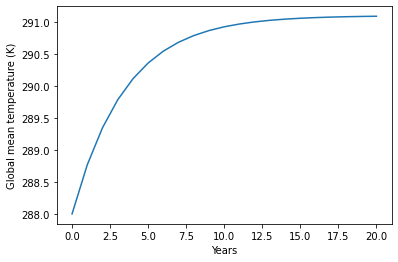

In [ ]:
plt.plot(Years, Tsteps)
plt.xlabel('Years')
plt.ylabel('Global mean temperature (K)');

Note how the temperature *adjusts smoothly toward the equilibrium temperature*, that is, the temperature at which
ASR = OLR.

**If the planetary energy budget is out of balance, the temperature must change so that the OLR gets closer to the ASR!**

The adjustment is actually an *exponential decay* process: The rate of adjustment slows as the temperature approaches equilibrium. 

The temperature gets very very close to equilibrium but never reaches it exactly.

## In-class Exercises III.1

## Time-dependent warming in the zero-dimensional Energy Balance Model

In lecture we defined a zero-dimensional energy balance model for the global mean surface temperature $T_s$ as follows

$$ C  \frac{dT_s}{dt} = \text{ASR} - \text{OLR}$$

$$ \text{ASR} = (1-\alpha) Q $$

$$ \text{OLR} = \tau \sigma T_s^4$$

where we defined these terms:

- $C$ is a heat capacity for the atmosphere-ocean column
- $\alpha$ is the global mean planetary albedo
- $\sigma = 5.67 \times 10^{-8}$ W m$^{-2}$ K$^{-4}$ is the Stefan-Boltzmann constant
- $\tau$ is our transmissivity parameter for the atmosphere.
- $Q$ is the global-mean incoming solar radiation, or *insolation*.

Refer back to our class notes for parameter values.

1. If the heat penetrated to twice as deep into the ocean, the value of $C$ would be twice as large. Would this affect the **equilibrium temperature**? Why or why not?


2. In class we used numerical timestepping to investigate a *hypothetical climate change scenario* in which $\tau$ decreases to 0.57 and $\alpha$ increases to 0.32. We produced a graph of $T_s(t)$ over a twenty year period, starting from an initial temperature of 288 K. Here you will repeat this calculate with a larger value of $C$ and compare the warming rates. Specifically:
    - Repeat our in-class time-stepping calculation with the same parameters we used before (including a heat capacity of $C = 4\times10^8$ J m$^{-2}$ K$^{-1}$), but extend it to 50 years. **You should create an array of temperatures with 51 elements, beginning from 288 K**.
    - Now do it again, but use $C = 8\times10^8$ J m$^{-2}$ K$^{-1}$ (representing 200 meters of water). You should **create another 51-element array** of temperatures also beginning from 288 K.
    - **Make a well-labeled graph** that compares the two temperatures over the 50-year period.
    


3. What do your results show about the role of heat capacity on climate change? **Give a short written answer.**

In [ ]:
c_w = 4E3  #  Specific heat of water in J/kg/K
rho_w = 1E3  #  Density of water in kg/m3
H = 200.   #  Depth of water in m
C = c_w * rho_w * H   #  Heat capacity of the model 
print('The effective heat capacity is {:.1e} J/m2/K'.format(C))

The effective heat capacity is 8.0e+08 J/m2/K


In [ ]:
def step_forward(T,C):
    return T + dt / C * ( ASR(alpha=0.32) - OLR(T, tau=0.57) )

numsteps = 50
Tsteps1 = np.zeros(numsteps+1)
Tsteps2 = np.zeros(numsteps+1)
Years = np.zeros(numsteps+1)
Tsteps2[0] = 288.
Tsteps1[0] = 288.
for n in range(numsteps):
    Years[n+1] = n+1
    Tsteps1[n+1] = step_forward( Tsteps1[n], c_w * rho_w * 100)
    Tsteps2[n+1] = step_forward( Tsteps2[n], c_w * rho_w * 200)
print(Tsteps)

[288.         288.38390133 288.72097528 289.01677926 289.27624693
 289.50374981 289.70315491 289.87787792 290.03093201 290.16497231
 290.28233615 290.38507932 290.47500863 290.55371103 290.62257954
 290.68283635 290.73555329 290.78166997 290.82200981 290.8572942
 290.88815496 290.91514538 290.93874983 290.95939231 290.97744391
 290.99322937 291.00703282 291.01910285 291.02965696 291.03888536
 291.04695448 291.05400984 291.06017874 291.06557251 291.0702885
 291.07441185 291.07801701 291.08116909 291.08392501 291.08633455
 291.08844125 291.09028314 291.09189353 291.0933015  291.09453248
 291.09560874 291.0965497  291.09737239 291.09809166 291.09872051
 291.09927032]


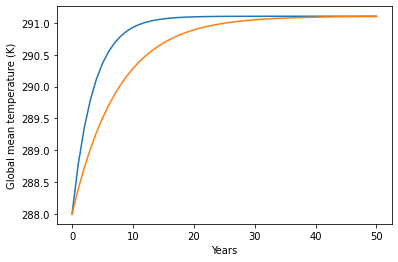

In [ ]:
plt.plot(Years, Tsteps1)
plt.plot(Years, Tsteps2)

plt.xlabel('Years')
plt.ylabel('Global mean temperature (K)');

## In-class Exercises III.2

## Time-dependent warming in the zero-dimensional Energy Balance Model

Please compare temperature evolution of three scenarios of climate change from the original equilibrium temperature 288K to the new equilibrium temperature.

In the first scenario, the planetary albedo changes to 0.2, but the transmissity remains 0.61.

In the 2nd scenario, the planetary albedo remains to 0.32, but the transmissity changes to 0.57.

In the 3rd scenario, the planetary albedo changes to 0.32, and the transmissity changes to 0.61.

**Make a well-labeled graph** that compares the three temperatures over the 50-year period, and write down what you find.

The effective heat capacity is 4.0e+08 J/m2/K
[288.         288.38390133 288.72097528 289.01677926 289.27624693
 289.50374981 289.70315491 289.87787792 290.03093201 290.16497231
 290.28233615 290.38507932 290.47500863 290.55371103 290.62257954
 290.68283635 290.73555329 290.78166997 290.82200981 290.8572942
 290.88815496 290.91514538 290.93874983 290.95939231 290.97744391
 290.99322937 291.00703282 291.01910285 291.02965696 291.03888536
 291.04695448 291.05400984 291.06017874 291.06557251 291.0702885
 291.07441185 291.07801701 291.08116909 291.08392501 291.08633455
 291.08844125 291.09028314 291.09189353 291.0933015  291.09453248
 291.09560874 291.0965497  291.09737239 291.09809166 291.09872051
 291.09927032]


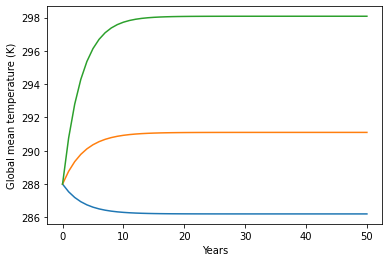

In [ ]:
H = 100.   #  Depth of water in m
C = c_w * rho_w * H   #  Heat capacity of the model 
print('The effective heat capacity is {:.1e} J/m2/K'.format(C))

def step_forward(T,alpha1,tau1):
    return T + dt / C * ( ASR(alpha=alpha1) - OLR(T, tau=tau1) )

numsteps = 50
Tsteps1 = np.zeros(numsteps+1)
Tsteps2 = np.zeros(numsteps+1)
Tsteps3 = np.zeros(numsteps+1)
Years = np.zeros(numsteps+1)
Tsteps2[0] = 288.
Tsteps1[0] = 288.
Tsteps3[0] = 288.
for n in range(numsteps):
    Years[n+1] = n+1
    Tsteps1[n+1] = step_forward( Tsteps1[n], 0.32, 0.61)
    Tsteps2[n+1] = step_forward( Tsteps2[n], 0.32, 0.57)
    Tsteps3[n+1] = step_forward( Tsteps3[n], 0.2, 0.61)
print(Tsteps)

plt.plot(Years, Tsteps1)
plt.plot(Years, Tsteps2)
plt.plot(Years, Tsteps3)

plt.xlabel('Years')
plt.ylabel('Global mean temperature (K)');